In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
### Load the training array, labels and features
train_array = np.load('train_array.npy')
train_labels = np.load('train_labels.npy')
train_features = np.load('train_features.npy')

In [3]:
### Load the validation array, labels and features
valid_array = np.load('valid_array.npy')
valid_labels = np.load('valid_labels.npy')
valid_features = np.load('valid_features.npy')

In [4]:
### Load the test array, labels and features
test_array = np.load('test_array.npy')
test_labels = np.load('test_labels.npy')
test_features = np.load('test_features.npy')

# Preprocess the data

In [5]:
### Define a pipeline with StandardScaler
pipe = Pipeline([
    ('scaler', StandardScaler()),
])

pipe.fit(train_features)

processed_train_features = pipe.transform(train_features)
processed_test_features = pipe.transform(test_features)

# Apply PCA
Apply PCA analysis on the training dataset. Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?

In [6]:
### Define the PCA and fit it
pca = PCA()
pca.fit(processed_train_features)

PCA()

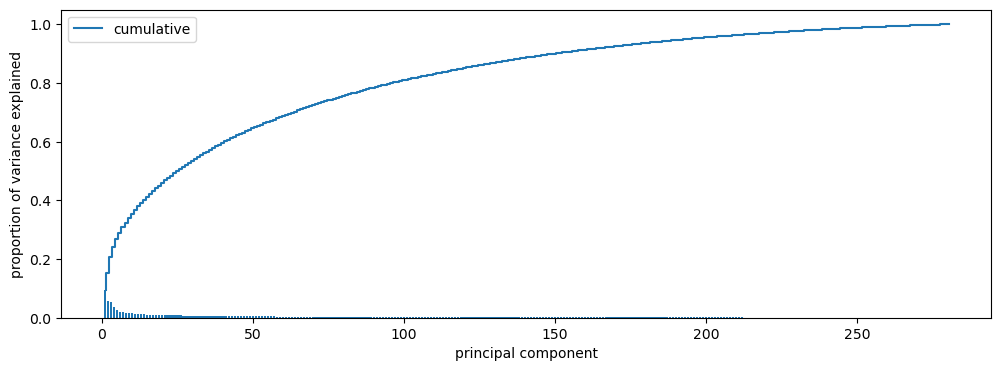

In [7]:
# Create bar plot
plt.figure(figsize=(12,4))
pve = pca.explained_variance_ratio_
xcor = np.arange(1, len(pve) + 1) 
plt.bar(xcor, pve)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor + 0.5,  # 1.5,2.5,..,n_components+0.5
    pve_cumsum,  # Cumulative sum
    label="cumulative",
)

# Add labels
plt.xlabel("principal component")
plt.ylabel("proportion of variance explained")
plt.legend()
plt.show()

In [8]:
print('Principal Component Analysis:')
for i in range(10):
    print(f'{(i+1)*10}% of the variance is explained by {len(pve_cumsum[pve_cumsum <= (i+1)/10])} components.')

Principal Component Analysis:
10% of the variance is explained by 1 components.
20% of the variance is explained by 2 components.
30% of the variance is explained by 6 components.
40% of the variance is explained by 13 components.
50% of the variance is explained by 25 components.
60% of the variance is explained by 40 components.
70% of the variance is explained by 63 components.
80% of the variance is explained by 96 components.
90% of the variance is explained by 149 components.
100% of the variance is explained by 278 components.


In [9]:
df_pca = pd.DataFrame(pve_cumsum, columns=['variance'])
df_pca['components'] = xcor
df_pca['floor'] = np.floor(np.round(df_pca['variance']*10))
df_pca.drop_duplicates('floor', keep='first')

,variance,components,floor
0,0.095431,1,1.0
1,0.152790,2,2.0
4,0.269952,5,3.0
9,0.354288,10,4.0
18,0.450670,19,5.0
32,0.554479,33,6.0
51,0.654135,52,7.0
77,0.750023,78,8.0
119,0.851252,120,9.0
193,0.950218,194,10.0


# Visualize the transformed data
After transforming the training dataset using the first two PCA components, visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. What can you say about the results?

In [10]:
### Define the PCA for 2 components
pca2 = PCA(n_components=2)
pca2.fit(processed_train_features)

PCA(n_components=2)

In [11]:
# Project data onto the first two components
X_2d = pca2.transform(processed_train_features)

Text(0, 0.5, '2nd component')

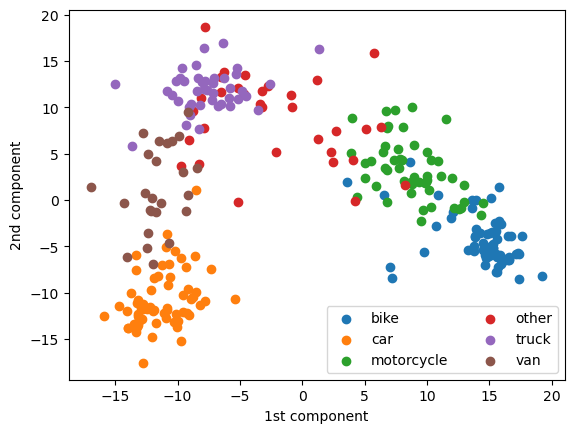

In [12]:
categories = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
for i in range(6):
    idx = train_labels == i
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label="{}".format(categories[i]))
plt.legend(ncols=2)
plt.xlabel("1st component")
plt.ylabel("2nd component")

Only the **car** and the **bike** are not mixed completely with the other categories. The remaining categories are mixed more.

# Apply k-means cluster
On the 2D transformed training data, apply k-means clustering with k equals 6. Plot the same 2D-plot as above but this time use the colors to distinguish between the six clusters obtained by k-means. Do the 6 clusters of k-means align with the 6 categories from above?

In [13]:
### Define the k-means with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_2d)

C:\Users\enric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\enric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

Text(0, 0.5, '2nd component')

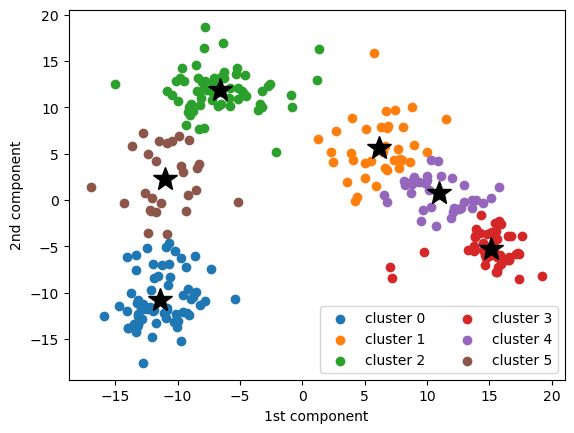

In [14]:
# Plot clusters
for cluster in [0, 1, 2, 3, 4, 5]:
    # Get points in this cluster
    idx = kmeans.labels_ == cluster

    # Plot points
    plt.scatter(
        X_2d[idx, 0], 
        X_2d[idx, 1], 
        label="cluster {}".format(cluster),
    )

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker="*", color="black", markersize=18)

plt.legend(ncols=2)
plt.xlabel("1st component")
plt.ylabel("2nd component")

The 6 clusters are not yully aligned with the categories.  
- 1 cluster contain almost all the elements of **Bike**.
- 1 cluster contain almost all the elements of **Car**.
- 2 clusters contain elements of **Motorcycle**, **Other** and **Car**.
- **Van**, with few elements of **Other** and **Car** is in 1 cluster
- 1 cluster contains elements of **Other** and **Truck**

# Transform the test dataset
Using the first two PCA components obtained form the training dataset, transform the test dataset. Visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. Based on this visualization, how many sample in the test dataset you think might be hard to classify?

In [15]:
# Project test data onto the first two components
X_2d_test = pca2.transform(processed_test_features)
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_2d_test)

C:\Users\enric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\enric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

Text(0, 0.5, '2nd component')

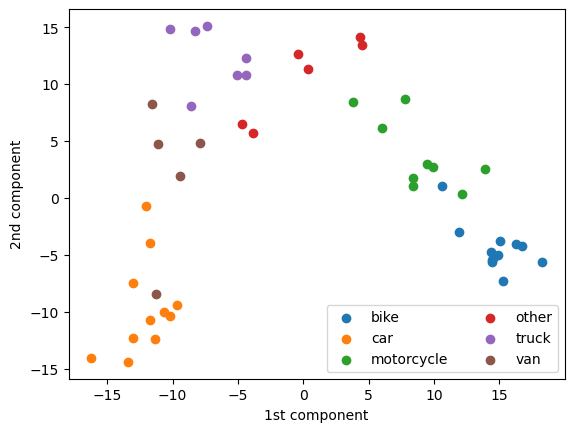

In [16]:
for i in range(6):
    idx = test_labels == i
    plt.scatter(X_2d_test[idx, 0], X_2d_test[idx, 1], label="{}".format(categories[i]))
plt.legend(ncols=2)
plt.xlabel("1st component")
plt.ylabel("2nd component")

Based on the previous plot, all the categories can be idetified, although not completely